В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [3]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [25]:
X = np.array(non_smoker_df.age)
y = np.array(non_smoker_df.charges)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3]

array([18, 28, 33])

In [28]:
X_with_intercept[:3]

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.]])

In [26]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [29]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [30]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [31]:
np.dot(X_with_intercept[0], MNK_coefs)

2719.059874396516

In [32]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [33]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

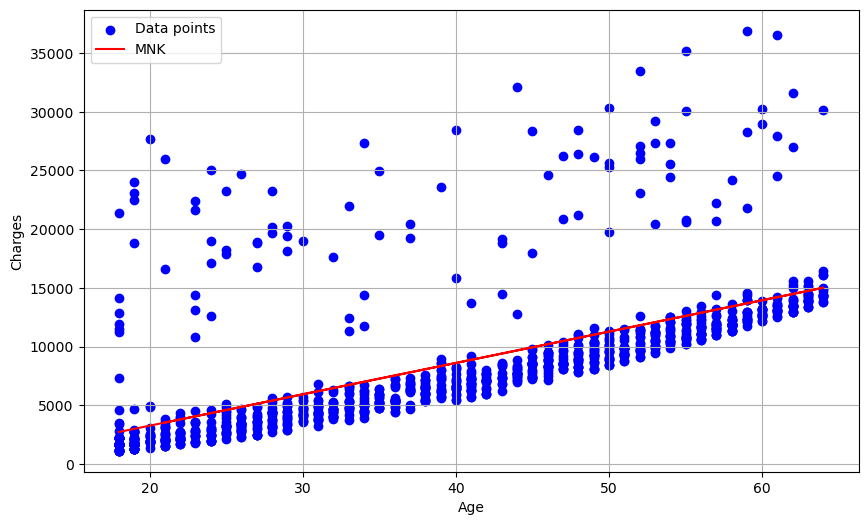

In [34]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions_MNK)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 4662.505766636395


Градієнтний спуск

In [52]:
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

X = X.reshape(-1, 1)
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=100)
predictions_fbgd = m * X[:, 0] + b

m, b

(220.15455659787733, 0.21295826871672194)

RMSE of fbgd: 4715.112301317364


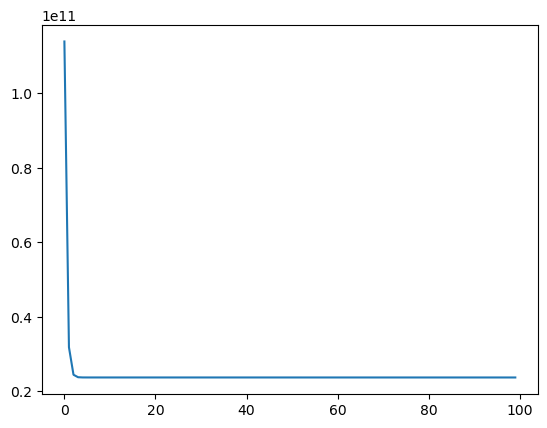

In [63]:
mse_fbgd = mean_squared_error(y, predictions_fbgd)
rmse_fbgd = np.sqrt(mse_fbgd)
print("RMSE of fbgd:", rmse_fbgd)
plt.plot(errors)

RMSE of fbgd: 4714.406277887308


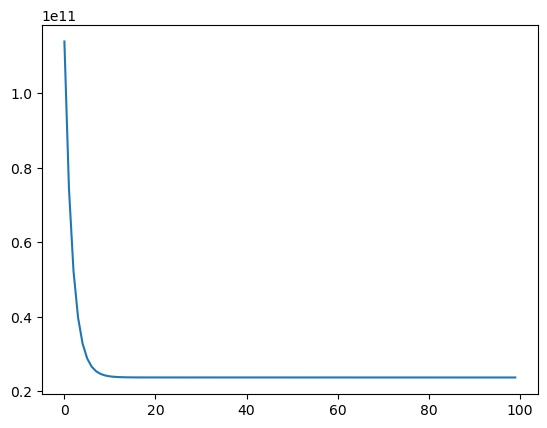

In [75]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0005, epochs=100)
predictions_fbgd_1 = m * X[:, 0] + b
mse_fbgd = mean_squared_error(y, predictions_fbgd)
rmse_fbgd_1 = np.sqrt(mse_fbgd)
print("RMSE of fbgd:", rmse_fbgd_1)
plt.plot(errors)

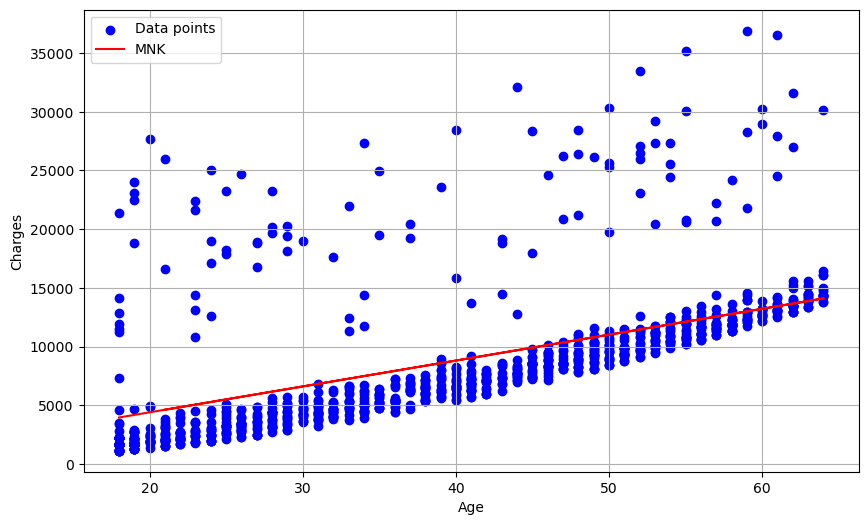

In [67]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_fbgd, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

RMSE of fbgd: 4715.112301317364


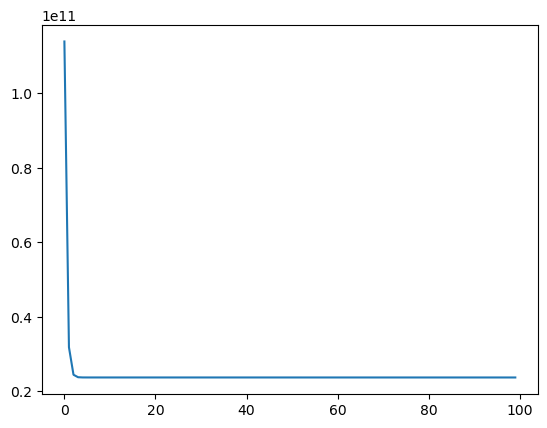

In [65]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0002, epochs=100)
predictions_fbgd = m * X[:, 0] + b
mse_fbgd = mean_squared_error(y, predictions_fbgd)
rmse_fbgd_2 = np.sqrt(mse_fbgd)
print("RMSE of fbgd:", rmse_fbgd_2)
plt.plot(errors)

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [69]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [70]:
predictions_sklearn = lin_reg.predict(X)

In [77]:
mse_lr = mean_squared_error(y, predictions_sklearn)
rmse_lr = np.sqrt(mse_lr)
print("RMSE of fbgd:", rmse_lr)

RMSE of fbgd: 4662.505766636395


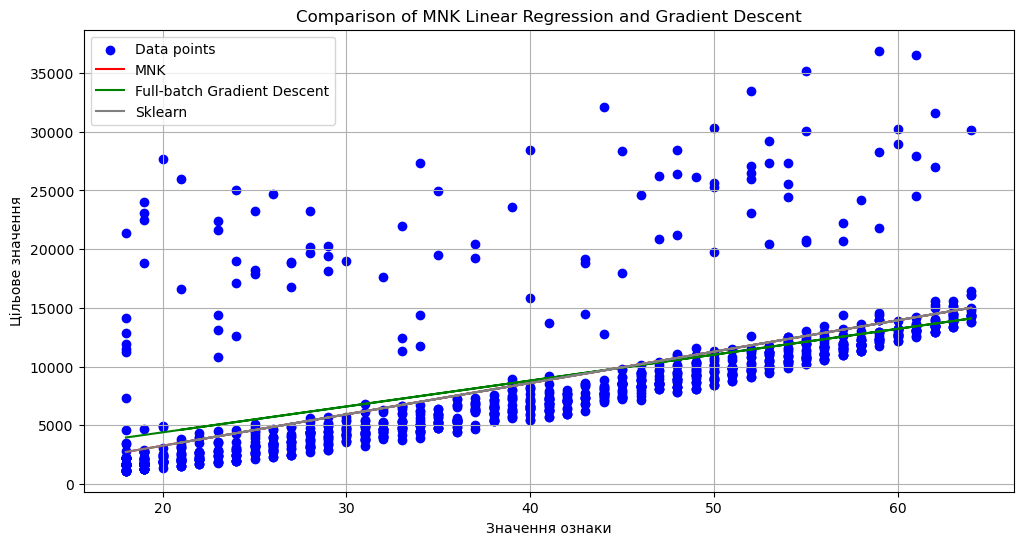

In [76]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_1, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of MNK Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


Результати моделей MNK та Sklearn співпадають, а модель побудована за допомогою градієнтного спуску має інші значення. Але в усіх випадках моделі мають досить велику середньоквадратичну помилку через те, що багато значень значно відхиляються від середніх. Найкраще значення, яке було досягнуто під час виконання завдання на розрахунок коефіцієнтів лінійної регресії вручну складає 4946. Тобто зараз вдалося досягти кращих значень.



 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [82]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = smoker_df.age
X = X.to_frame()
y = np.array(smoker_df.charges)

In [93]:
lin_reg_1 = LinearRegression()

In [96]:
lin_reg_1.fit(X, y)

LinearRegression()

In [97]:
lin_reg_1.coef_, lin_reg_1.intercept_

(array([305.23760211]), 20294.128126915966)

In [98]:
predictions_sklearn_1 = lin_reg_1.predict(X)

In [99]:
mse_lr_1 = mean_squared_error(y, predictions_sklearn_1)
rmse_lr_1 = np.sqrt(mse_lr_1)
print("MSE of fbgd:", mse_lr_1)
print("RMSE of fbgd:", rmse_lr_1)

MSE of fbgd: 114725592.72306103
RMSE of fbgd: 10711.00334810241


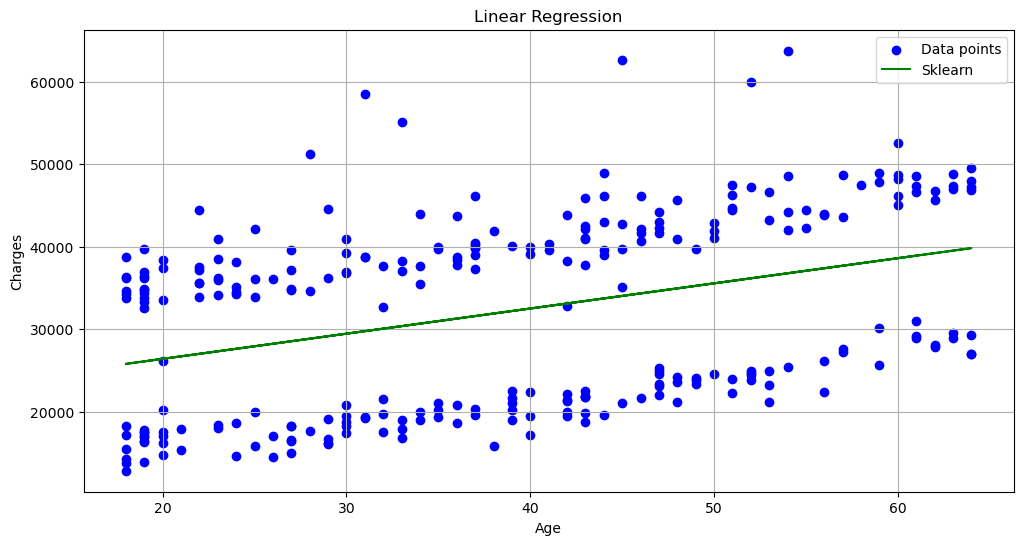

In [101]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X.iloc[:, 0], y, color='blue', label='Data points')
plt.plot(X.iloc[:, 0], predictions_sklearn_1, color='green', label='Sklearn')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Це не хороша модель, щоб її використовувати в компанії. Для отримання кращої моделі певно потрібно більше параметрів, або інший вид регресії